In [1]:
import pandas as pd
#from fpdf import FPDF
#import os
import matplotlib.pyplot as plt

In [2]:
csv_file = r"/home/arya/Desktop/VSCode/frb_db_B.csv"  
df = pd.read_csv(csv_file)

In [3]:
df

,Name,RA,DEC,MJD,UTC TOA
0,FRB20200913A,190.822625,-63.905139,59105.199568,2020-09-13T04:47:22.650
1,FRB20200913B,190.819833,-64.874694,59105.199739,2020-09-13T04:47:37.412
2,FRB20200913C,189.859250,-64.143833,59105.198870,2020-09-13T04:46:22.328
3,FRB20200913D,191.776292,-63.654444,59105.196880,2020-09-13T04:43:30.428
4,FRB20200913E,237.604167,-46.172194,59105.227890,2020-09-13T05:28:09.703
...,...,...,...,...,...
69,FRB20200918E,326.985708,-80.104000,59110.542022,2020-09-18T13:00:30.683
70,FRB20200918F,334.459917,-80.327139,59110.543747,2020-09-18T13:02:59.757
71,FRB20200919A,333.595708,-8.140194,59111.476835,2020-09-19T11:26:38.577
72,FRB20200919B,329.398292,-80.842778,59111.587025,2020-09-19T14:05:18.995


In [4]:
base_path = r"/home/arya/Desktop/VSCode/FRB_team_B/FRB_team_B"

In [5]:
df['FluxLimit(1e-6)_tbin_0.01'] = "None"
df['FluxLimit(1e-6)_tbin_0.1'] = "None"
df['FluxLimit(1e-6)_tbin_1.0'] = "None"

In [11]:
for idx, row in df.iterrows():
    name = row['Name']
    flux_file_path = os.path.join(base_path, name, "Products", f"{name}_Fluxlimits_-1.txt")
    
    if os.path.exists(flux_file_path):
        # Read the flux file
        flux_df = pd.read_csv(flux_file_path, delim_whitespace=True)
        
        # Extract and format flux values for specific tbin values
        flux_0_01 = flux_df.loc[flux_df['tbin'] == 0.01, 'Flux'].values
        flux_0_1 = flux_df.loc[flux_df['tbin'] == 0.1, 'Flux'].values
        flux_1_0 = flux_df.loc[flux_df['tbin'] == 1.0, 'Flux'].values
        
        # Assign formatted values to the main DataFrame if they exist
        if len(flux_0_01) > 0:
            df.at[idx, 'FluxLimit(1e-6)_tbin_0.01'] = f"{flux_0_01[0]*1e6:.4f}"
        if len(flux_0_1) > 0:
            df.at[idx, 'FluxLimit(1e-6)_tbin_0.1'] = f"{flux_0_1[0]*1e6:.4f}"
        if len(flux_1_0) > 0:
            df.at[idx, 'FluxLimit(1e-6)_tbin_1.0'] = f"{flux_1_0[0]*1e6:.4f}"
    else:
        continue
        #print(f"Flux file not found for {name}: {flux_file_path}")


/tmp/ipykernel_2066185/2674984110.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  flux_df = pd.read_csv(flux_file_path, delim_whitespace=True)
/tmp/ipykernel_2066185/2674984110.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  flux_df = pd.read_csv(flux_file_path, delim_whitespace=True)
/tmp/ipykernel_2066185/2674984110.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  flux_df = pd.read_csv(flux_file_path, delim_whitespace=True)
/tmp/ipykernel_2066185/2674984110.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  flux_df = pd.read_csv(flux_file_path, delim_whitespace=True)
/tmp/ipykernel_20661

In [12]:
df

,Name,RA,DEC,MJD,UTC TOA,FluxLimit(1e-6)_tbin_0.01,FluxLimit(1e-6)_tbin_0.1,FluxLimit(1e-6)_tbin_1.0
0,FRB20200913A,190.822625,-63.905139,59105.199568,2020-09-13T04:47:22.650,8.0596,1.7515,0.4274
1,FRB20200913B,190.819833,-64.874694,59105.199739,2020-09-13T04:47:37.412,8.0596,1.7515,0.4274
2,FRB20200913C,189.859250,-64.143833,59105.198870,2020-09-13T04:46:22.328,8.0596,1.7515,0.4274
3,FRB20200913D,191.776292,-63.654444,59105.196880,2020-09-13T04:43:30.428,8.0596,1.7515,0.4274
4,FRB20200913E,237.604167,-46.172194,59105.227890,2020-09-13T05:28:09.703,9.8674,2.8962,0.7063
...,...,...,...,...,...,...,...,...
69,FRB20200918E,326.985708,-80.104000,59110.542022,2020-09-18T13:00:30.683,5.6508,1.2453,0.2976
70,FRB20200918F,334.459917,-80.327139,59110.543747,2020-09-18T13:02:59.757,7.5496,1.6638,0.3976
71,FRB20200919A,333.595708,-8.140194,59111.476835,2020-09-19T11:26:38.577,5.9955,1.2915,0.3120
72,FRB20200919B,329.398292,-80.842778,59111.587025,2020-09-19T14:05:18.995,6.2124,1.3247,0.3230


In [14]:
Team_Name = input("Team_Name = ")
output_csv_path = f"/home/arya/Desktop/VSCode/frb_db_{Team_Name}_with_flux.csv"  
df.to_csv(output_csv_path, index=False)

print(f"Updated CSV file saved to {output_csv_path}")

Updated CSV file saved to /home/arya/Desktop/VSCode/frb_db_B_with_flux.csv


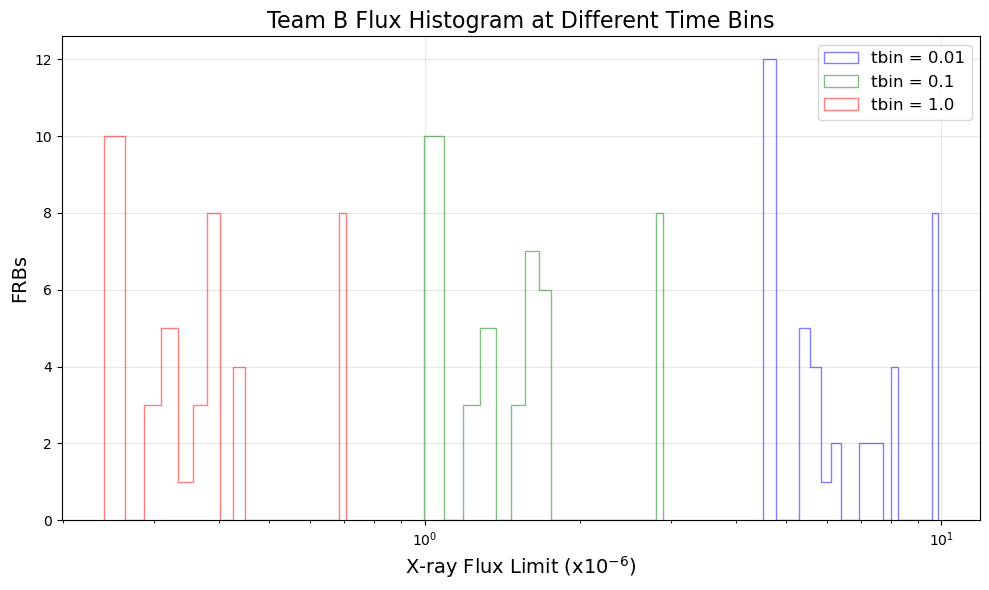

In [20]:
flux_0_01 = pd.to_numeric(df['FluxLimit(1e-6)_tbin_0.01'], errors='coerce').dropna()
flux_0_1 = pd.to_numeric(df['FluxLimit(1e-6)_tbin_0.1'], errors='coerce').dropna()
flux_1_0 = pd.to_numeric(df['FluxLimit(1e-6)_tbin_1.0'], errors='coerce').dropna()

# Plotting the histograms
plt.figure(figsize=(10, 6))
plt.hist(flux_0_01, bins=20,histtype='step', alpha=0.5, label='tbin = 0.01', color='blue')
plt.hist(flux_0_1, bins=20, histtype='step',alpha=0.5, label='tbin = 0.1', color='green')
plt.hist(flux_1_0, bins=20, histtype='step',alpha=0.5, label='tbin = 1.0', color='red')

plt.xscale('log')
# Adding labels and legend
plt.title('Team B Flux Histogram at Different Time Bins', fontsize=16)
plt.xlabel('X-ray Flux Limit (x$10^{-6}$)', fontsize=14)
plt.ylabel('FRBs', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
columns_to_include = ['Name', 'RA','DEC','MJD','UTC TOA']  # Columns to display in the PDF
name_column = 'Name'  # Column in CSV that determines the folder name
identifier_column = ''  

In [10]:
base_image_path = r"/home/arya/Desktop/VSCode/FRB_team_A/"  

In [11]:
# Step 3: Initialize the PDF
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'CSV to PDF with Images', align='C', ln=True)

pdf = PDF()
pdf.set_auto_page_break(auto=True, margin=15)

In [12]:
image_variants = ['0.01', '0.1', '1.0']  # Variants of the image naming convention

In [13]:
for index, row in df.iterrows():
    pdf.add_page()
    pdf.set_font('Arial', size=12)
    
    # Add text columns
    for col in columns_to_include:
        pdf.cell(0, 10, f"{col}: {row[col]}", ln=True)
    
    # Construct the dynamic image path based on the 'Name' column
    source_folder = row[name_column]
    image_folder_path = os.path.join(base_image_path, source_folder, "Products")
    
    # Add all image variants
    for variant in image_variants:
        image_file = os.path.join(
            image_folder_path, 
            f"snap_tbin_{row[identifier_column]}_26822_{variant}_czt.png"
        )
        if os.path.exists(image_file):
            pdf.cell(0, 10, f"Image (Variant {variant}):", ln=True)
            pdf.image(image_file, x=10, y=pdf.get_y(), w=100)  # Adjust width/position as needed
            pdf.ln(65)  # Leave space below the image
        else:
            pdf.cell(0, 10, f"Image not found: {image_file}", ln=True)

/tmp/ipykernel_1837987/3522999557.py:4: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 12)
/tmp/ipykernel_1837987/3522999557.py:5: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  self.cell(0, 10, 'CSV to PDF with Images', align='C', ln=True)
/tmp/ipykernel_1837987/378343683.py:3: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', size=12)
/tmp/ipykernel_1837987/378343683.py:7: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, f"{col}: {row[col]}", ln=True)


KeyError: ''

In [ ]:
# Step 5: Save the PDF
Team_Name = input("FRB Team = ")  # Prompt for team name
output_pdf = f"/home/arya/Desktop/VSCode/Final_FRB_LIST_Team_{Team_Name}.pdf"  # Dynamic file path
pdf.output(output_pdf)  # Save the PDF

print(f"PDF created successfully: {output_pdf}")  # Notify the user


PDF created successfully: /home/arya/Desktop/VSCode/Final_FRB_LIST_Team_A.pdf
